In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import numpy.fft as fft

In [2]:
def indices(arr: list)->list:
    return [i for i in range(len(arr))]

def analyze_fft(name: str, save = False):
    fft = pd.read_csv(name + '.csv')
    wf = pd.read_csv(name + '_original.csv')

    f, axs = plt.subplots(4, 2, figsize=(10,8))
    
    axs[0,0].plot(indices(wf['re']), wf['re'], label='Re')
    axs[0,0].legend()
    axs[1,0].plot(indices(wf['im']), wf['im'], label='Im', color="orange")
    axs[1,0].legend()

    axs[0, 1].plot(indices(fft['re']), fft['re'], label='Re')
    axs[0,1].legend()
    axs[1, 1].plot(indices(fft['im']), fft['im'], label='Im', color="orange")
    axs[1,1].legend()

    np_fft = np.fft.fft(wf['re'] + 1j*wf['im'])
    axs[2, 0].plot(indices(np_fft), [e.real for e in np_fft], label='Re')
    axs[2,0].legend()
    axs[3, 0].plot(indices(np_fft), [e.imag for e in np_fft], label='Im', color="orange")
    axs[3,0].legend()

    np_ifft = np.fft.ifft(fft['re'] + 1j*fft['im'])
    axs[2,1].plot(indices(np_ifft), [e.real for e in np_ifft], label='Re')
    axs[2,1].legend()
    axs[3, 1].plot(indices(np_ifft), [e.imag for e in np_ifft], label='Im', color="orange")
    axs[3,1].legend()

    if save:
        plt.savefig(name + ".jpg", dpi=350)

    plt.show()

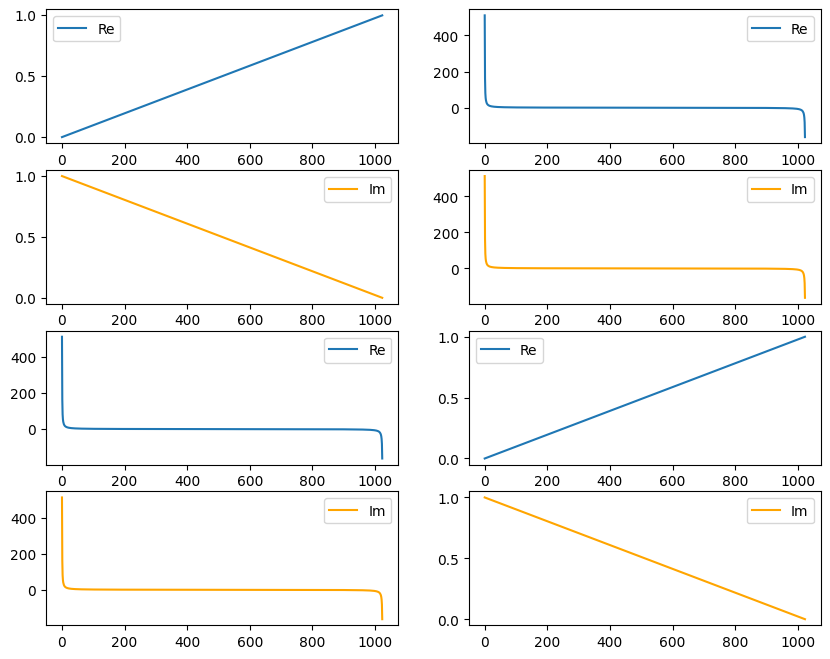

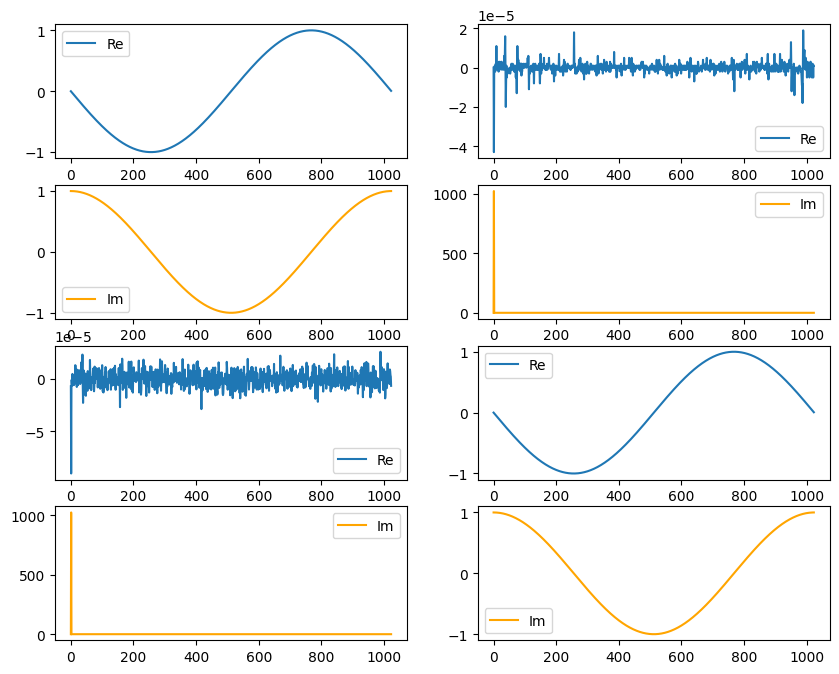

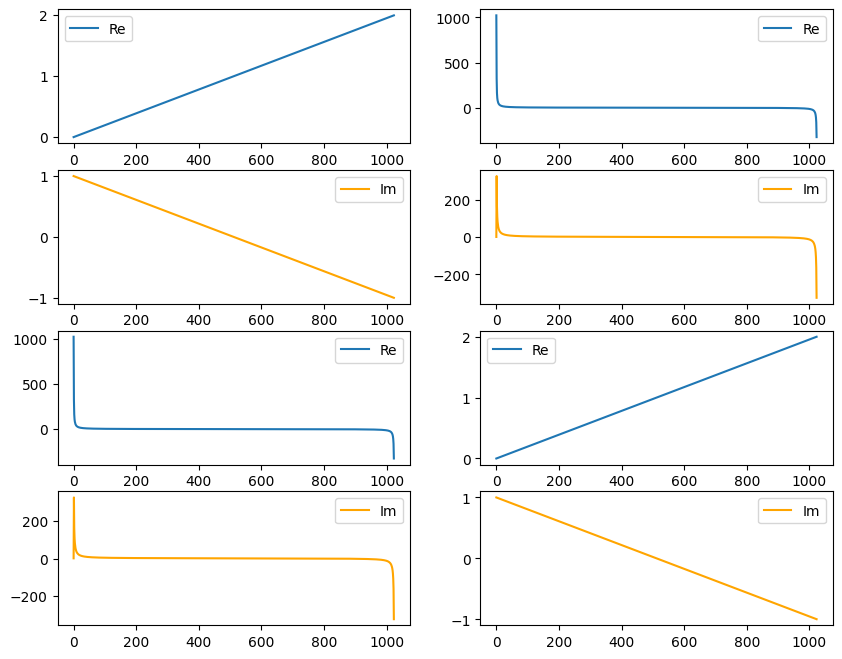

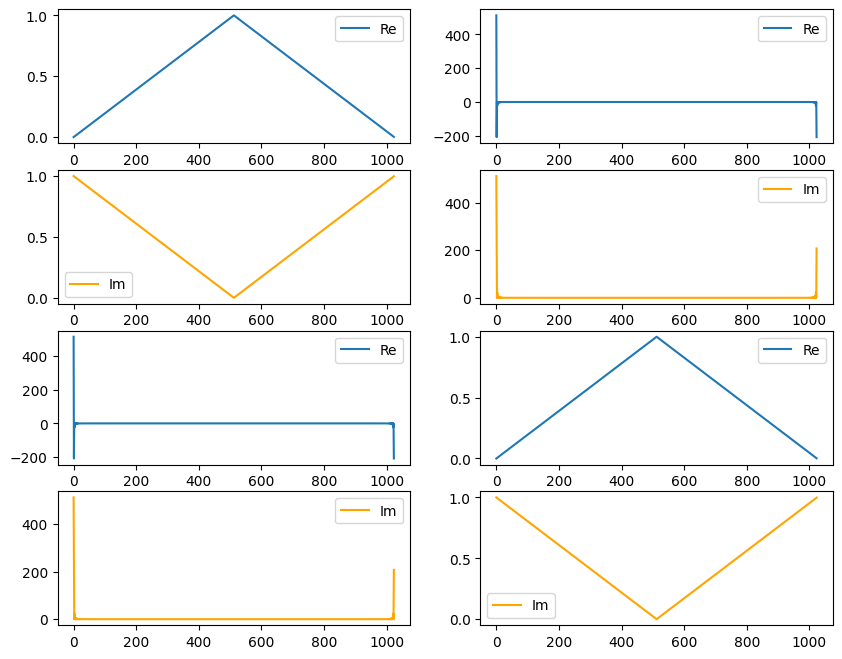

In [3]:

SAVE = False
analyze_fft("saw", SAVE)
analyze_fft("sin", SAVE)
analyze_fft("square", SAVE)
analyze_fft("triangle", SAVE)